# This is a census dataset of South African for COVID'19 Vulnerability Map. 

## South Africa is divided into 4392 wards. We will aggregate the target indicators(households with 5+ members and no on-premises water) and the other predictive variables from the census across all the households within each ward to create an aggregrated value of each indicator per ward.

## Target: It's to predict the percentage of households that fall into a particularly vulnerable bracket. ( large household who must leave their homes to fetch water) using the dataset

### Evaluation: The error metric is Root Mean Squared Error (RMSE).

### ML problem: Regression.

#### Constriat: it must be interpretiable

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno

In [2]:
train = pd.read_csv('Train_maskedv2.csv')
test = pd.read_csv('Test_maskedv2.csv')
submit = pd.read_csv('samplesubmissionv2.csv')
variable = pd.read_csv('variable_descriptions_v2.csv')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3174 entries, 0 to 3173
Data columns (total 50 columns):
ward                    3174 non-null object
total_households        3174 non-null float64
total_individuals       3174 non-null float64
target_pct_vunerable    3174 non-null float64
dw_00                   3174 non-null float64
dw_01                   3174 non-null float64
dw_02                   3174 non-null float64
dw_03                   3174 non-null float64
dw_04                   3174 non-null float64
dw_05                   3174 non-null float64
dw_06                   3174 non-null float64
dw_07                   3174 non-null float64
dw_08                   3174 non-null float64
dw_09                   3174 non-null float64
dw_10                   3174 non-null float64
dw_11                   3174 non-null float64
dw_12                   3174 non-null int64
dw_13                   3174 non-null int64
psa_00                  3174 non-null float64
psa_01                  

In [5]:
variable

,Column,Description
0,total_households,Totoal number of households in ward
1,total_individuals,Total number of individuals in ward
2,target_pct_vunerable,Percentage of large households who have to lea...
3,dw_00,Percentage of dwellings of type: House or bric...
4,dw_01,Percentage of dwellings of type: Traditional d...
5,dw_02,Percentage of dwellings of type: Flat or apart...
6,dw_03,Percentage of dwellings of type: Cluster house...
7,dw_04,Percentage of dwellings of type: Townhouse (se...
8,dw_05,Percentage of dwellings of type: Semi-detached...
9,dw_06,Percentage of dwellings of type: House/flat/ro...


In [6]:
train.head()

,ward,total_households,total_individuals,target_pct_vunerable,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,dw_07,dw_08,dw_09,dw_10,dw_11,dw_12,dw_13,psa_00,psa_01,psa_02,psa_03,psa_04,stv_00,stv_01,car_00,car_01,lln_00,lln_01,lan_00,lan_01,lan_02,lan_03,lan_04,lan_05,lan_06,lan_07,lan_08,lan_09,lan_10,lan_11,lan_12,lan_13,lan_14,pg_00,pg_01,pg_02,pg_03,pg_04,lgt_00
0,9D9BEUB,13569.97801,39024.03083,1.739801,0.354806,0.004781,0.170498,0.007861,0.006796,0.023082,0.014743,0.044411,0.360511,0.004950,0.000848,0.006711,0,0,0.192690,0.626544,0.000396,0.071214,0.109157,0.275335,0.724665,0.343501,0.656499,0.326122,0.673878,0.012956,0.482007,0.009574,0.109440,0.299974,0.001880,0.015047,0.004691,0.003556,0.003843,0.000787,0.001723,0.027796,0,0.026727,0.524666,0.041460,0.394550,0.029031,0.010292,0.599259
1,RERH3XM,13593.88256,32879.94646,1.993381,0.262140,0.002066,0.077669,0.000597,0.000977,0.003759,0.099883,0.231013,0.289105,0.025454,0.000289,0.007050,0,0,0.165663,0.701452,0.000713,0.016803,0.115370,0.059933,0.940067,0.080532,0.919468,0.033706,0.966294,0.003241,0.013292,0.010543,0.233694,0.486355,0.029286,0.111983,0.011787,0.004042,0.010961,0.005768,0.041982,0.021312,0,0.015754,0.993900,0.001829,0.000854,0.000586,0.002832,0.699136
2,GJWA3BO,2698.30050,8261.71093,0.038340,0.728101,0.002292,0.051663,0.008209,0.001444,0.005089,0.059432,0.132829,0.001320,0.002305,0.000849,0.006466,0,0,0.293674,0.534299,0.000397,0.027582,0.144048,0.169733,0.830267,0.108760,0.891240,0.056128,0.943872,0.008827,0.019836,0.004155,0.220034,0.077659,0.002389,0.560416,0.018953,0.010277,0.004701,0.002755,0.014786,0.005827,0,0.049384,0.990007,0.003582,0.002546,0.003201,0.000663,0.972315
3,GW6VRB7,1965.96698,9069.77694,7.411006,0.613206,0.138127,0.004999,0.002704,0.000000,0.002788,0.007380,0.119178,0.106532,0.002003,0.000746,0.002339,0,0,0.317221,0.518639,0.000000,0.026993,0.137148,0.105563,0.894437,0.241621,0.758379,0.067871,0.932129,0.059052,0.015682,0.011199,0.004887,0.795019,0.004566,0.072190,0.003563,0.004372,0.008551,0.001135,0.003087,0.003136,0,0.013562,0.928682,0.004464,0.009854,0.054701,0.002299,0.735333
4,CN9JZJC,1852.07821,9908.84404,8.223907,0.797462,0.120830,0.060677,0.001155,0.001042,0.000508,0.002171,0.006762,0.000534,0.001608,0.000000,0.007251,0,0,0.421475,0.403228,0.000000,0.029483,0.145814,0.057581,0.942419,0.135979,0.864021,0.060193,0.939807,0.001898,0.007864,0.014715,0.001891,0.960607,0.001905,0.001058,0.004606,0.003385,0.000246,0.000236,0.000117,0.001471,0,0.000000,0.994072,0.000476,0.004033,0.000704,0.000714,0.646964


In [7]:
def distplot(col):
    plt.figure(figsize=(15,9))
    sns.distplot(train[col], bins=50, color='g').set_title(col)
    plt.show()
    
def jointplot(col):
    plt.figure(figsize=(10,8))
    sns.jointplot(x='target_pct_vunerable', y=col, data=train, color='b')
    plt.show()

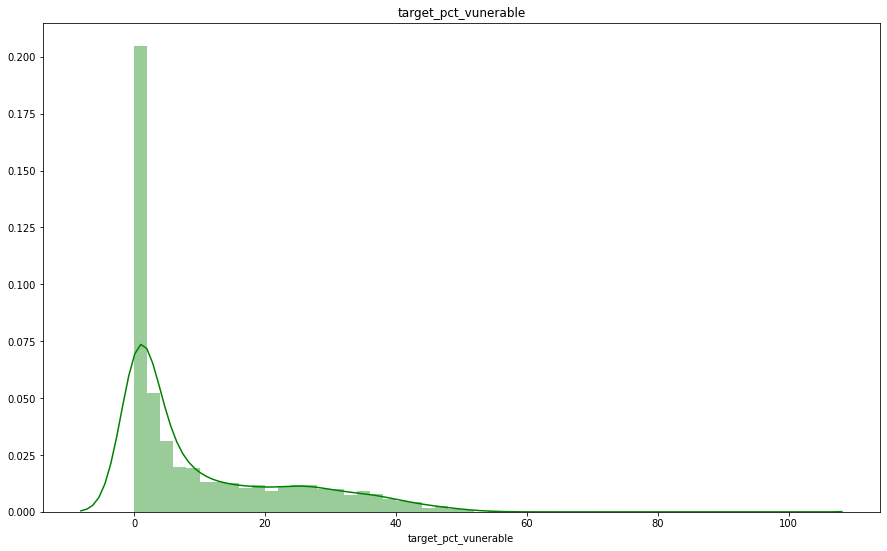

In [8]:
distplot('target_pct_vunerable')

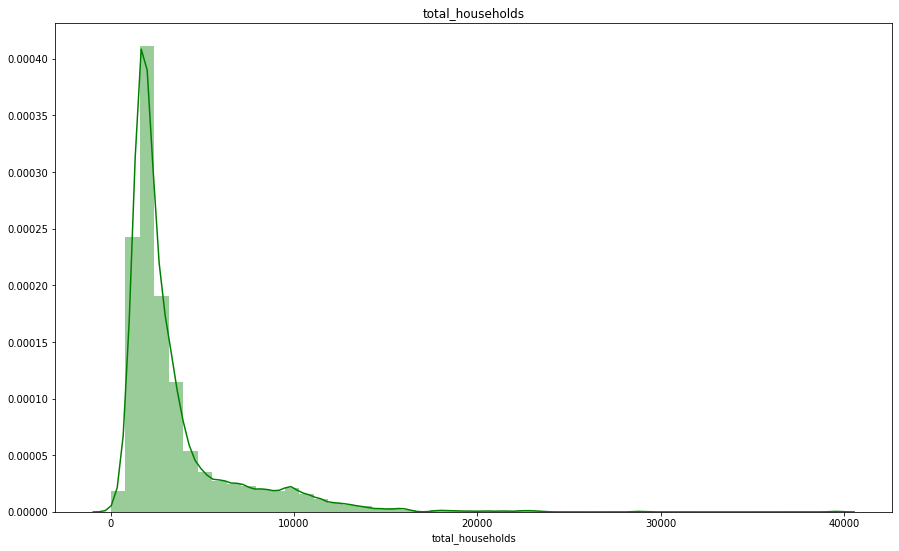

In [9]:
distplot('total_households')

<Figure size 720x576 with 0 Axes>

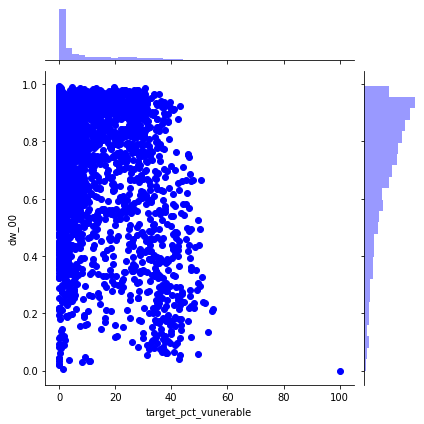

In [10]:
jointplot('dw_00')

<Figure size 720x576 with 0 Axes>

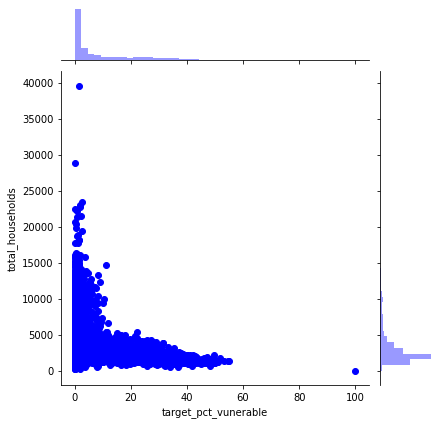

In [11]:
jointplot('total_households')# here we can easily see that our total_households have some outliers and definitely, we have a
#                              outlier in target_pct_vunerable.

<function matplotlib.pyplot.show(*args, **kw)>

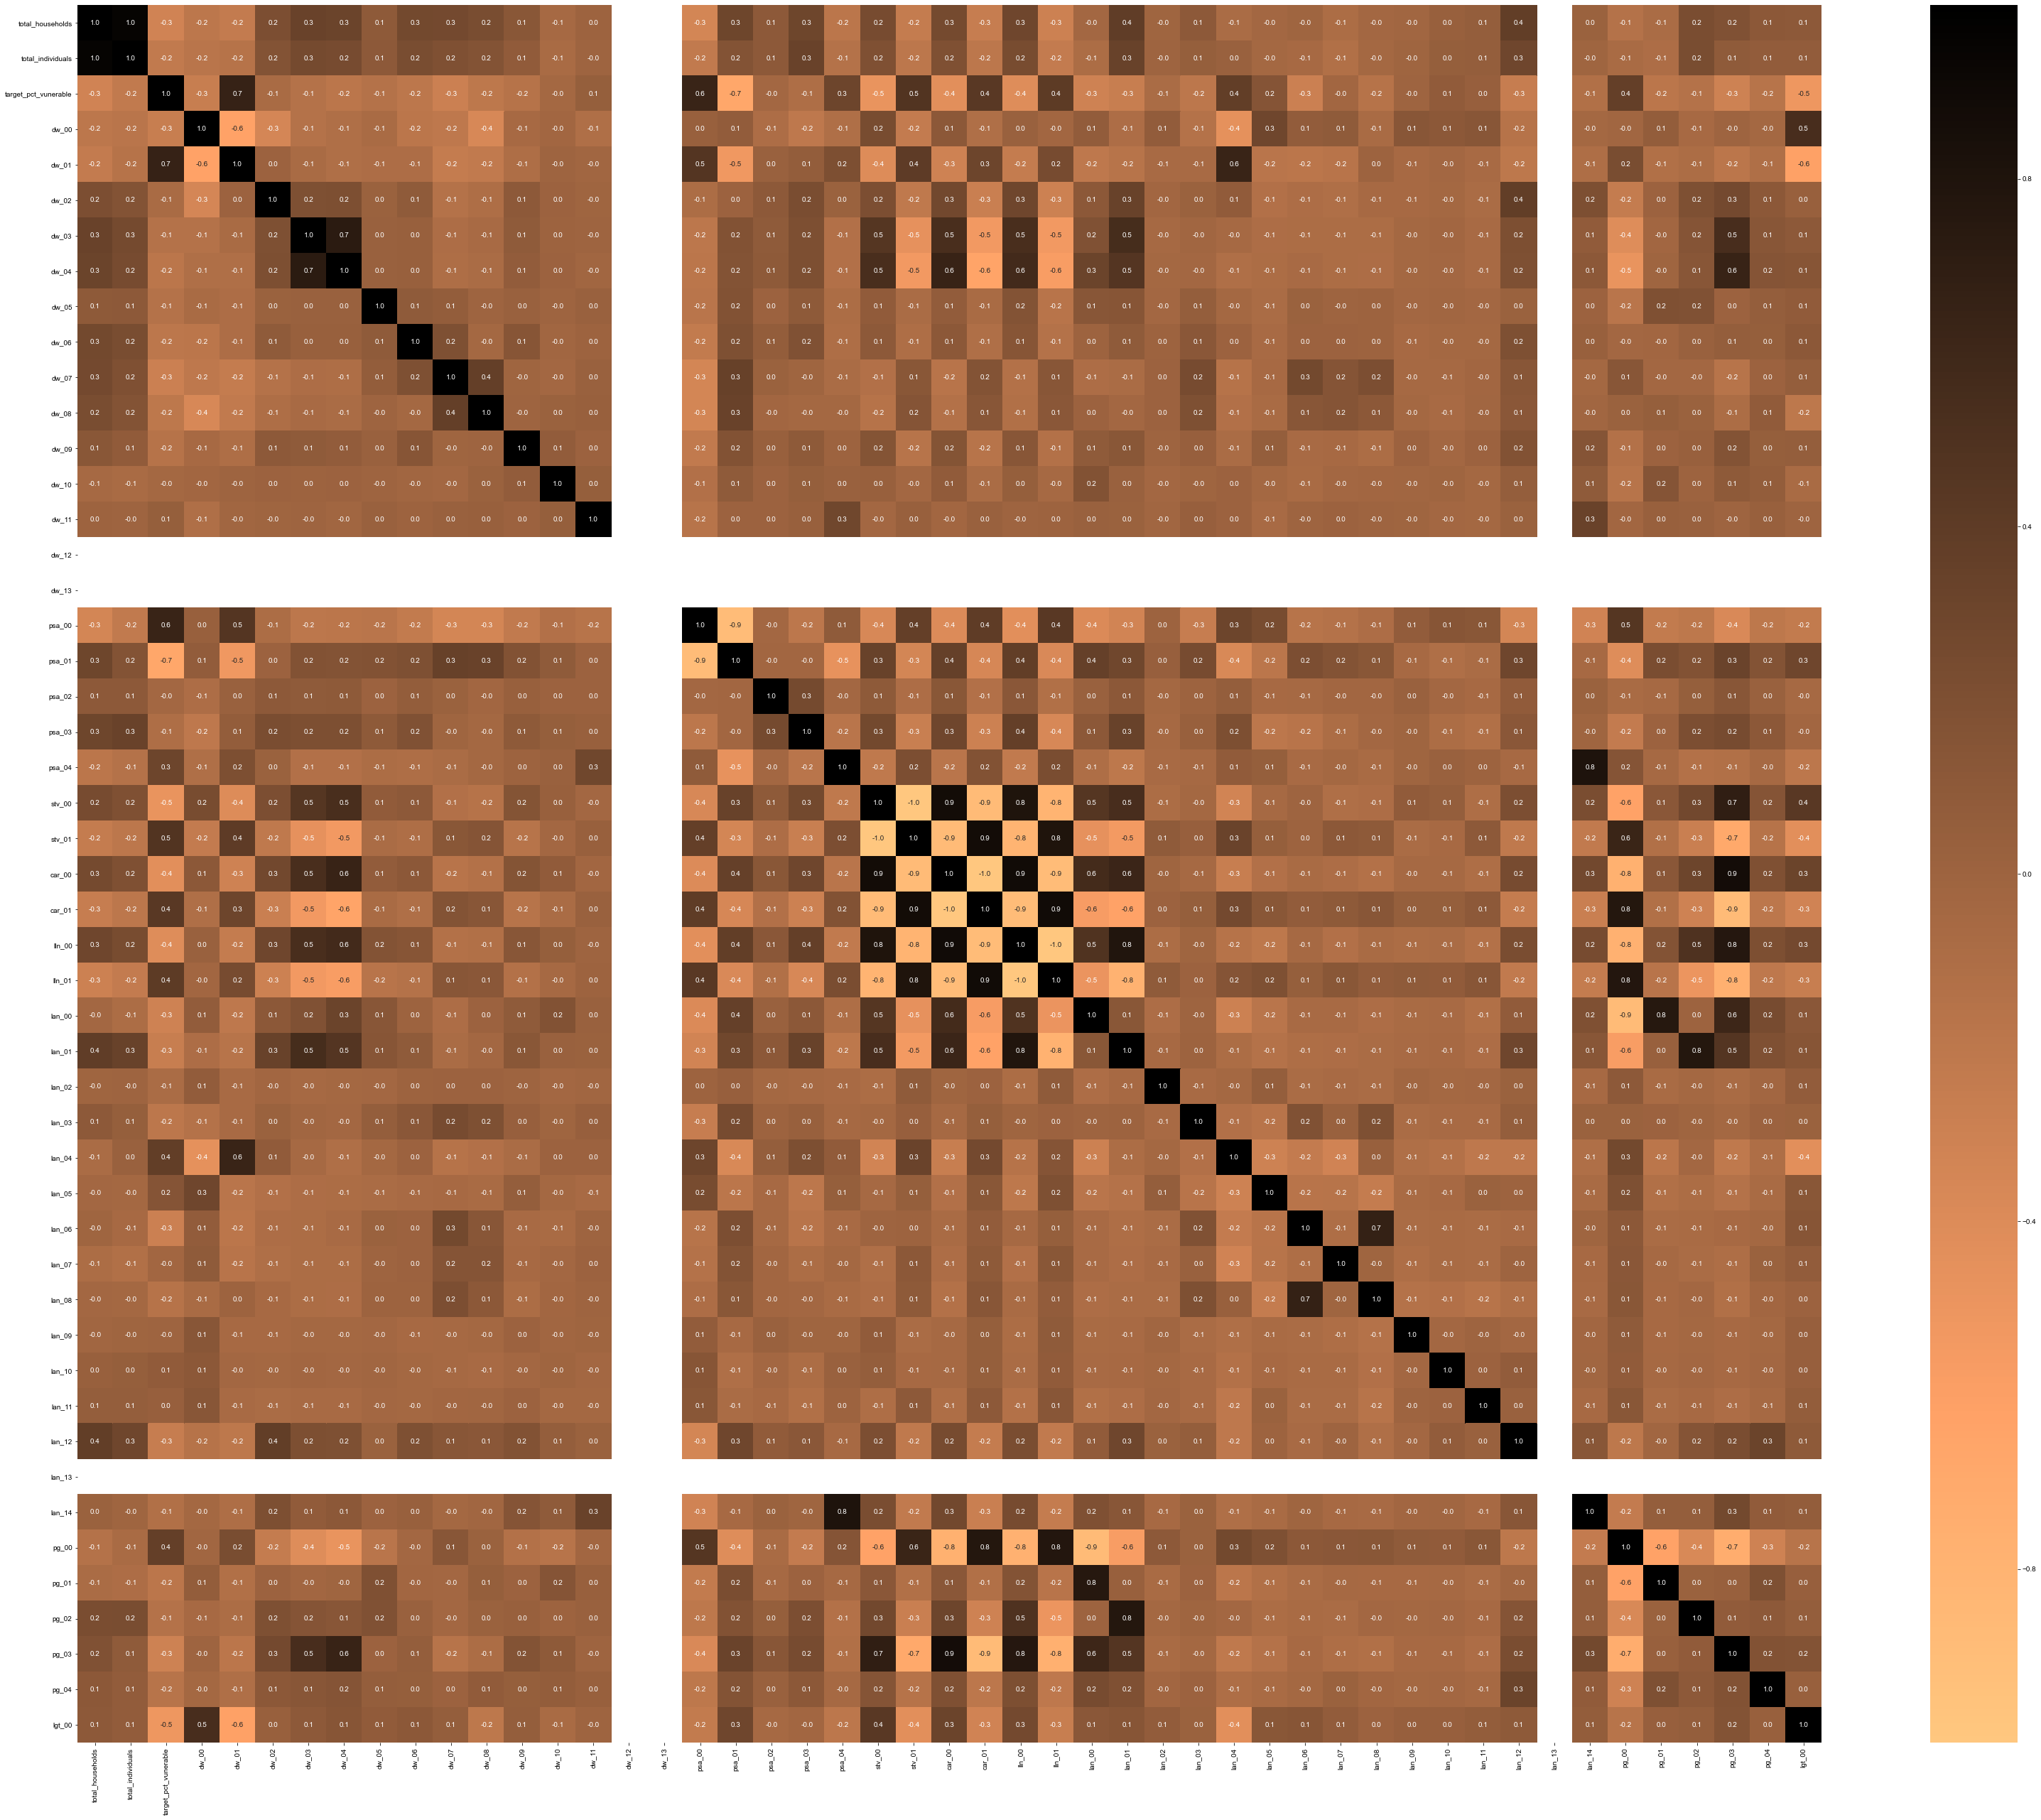

In [12]:
col = [col for col in train.columns]
data = train[col]
data_corr = data.corr()
fig, ax = plt.subplots(figsize=(35,25))
sns.heatmap(data=data_corr, annot=True, cmap='copper_r', fmt='.1f', ax=ax)
sns.set(font_scale=1.45)
plt.show

#He we see that some columns are unnecessary such as dw_12, dw_13 and lan_13

In [13]:
train.drop(['dw_12', 'dw_13', 'lan_13'], axis=1, inplace=True)

<function matplotlib.pyplot.show(*args, **kw)>

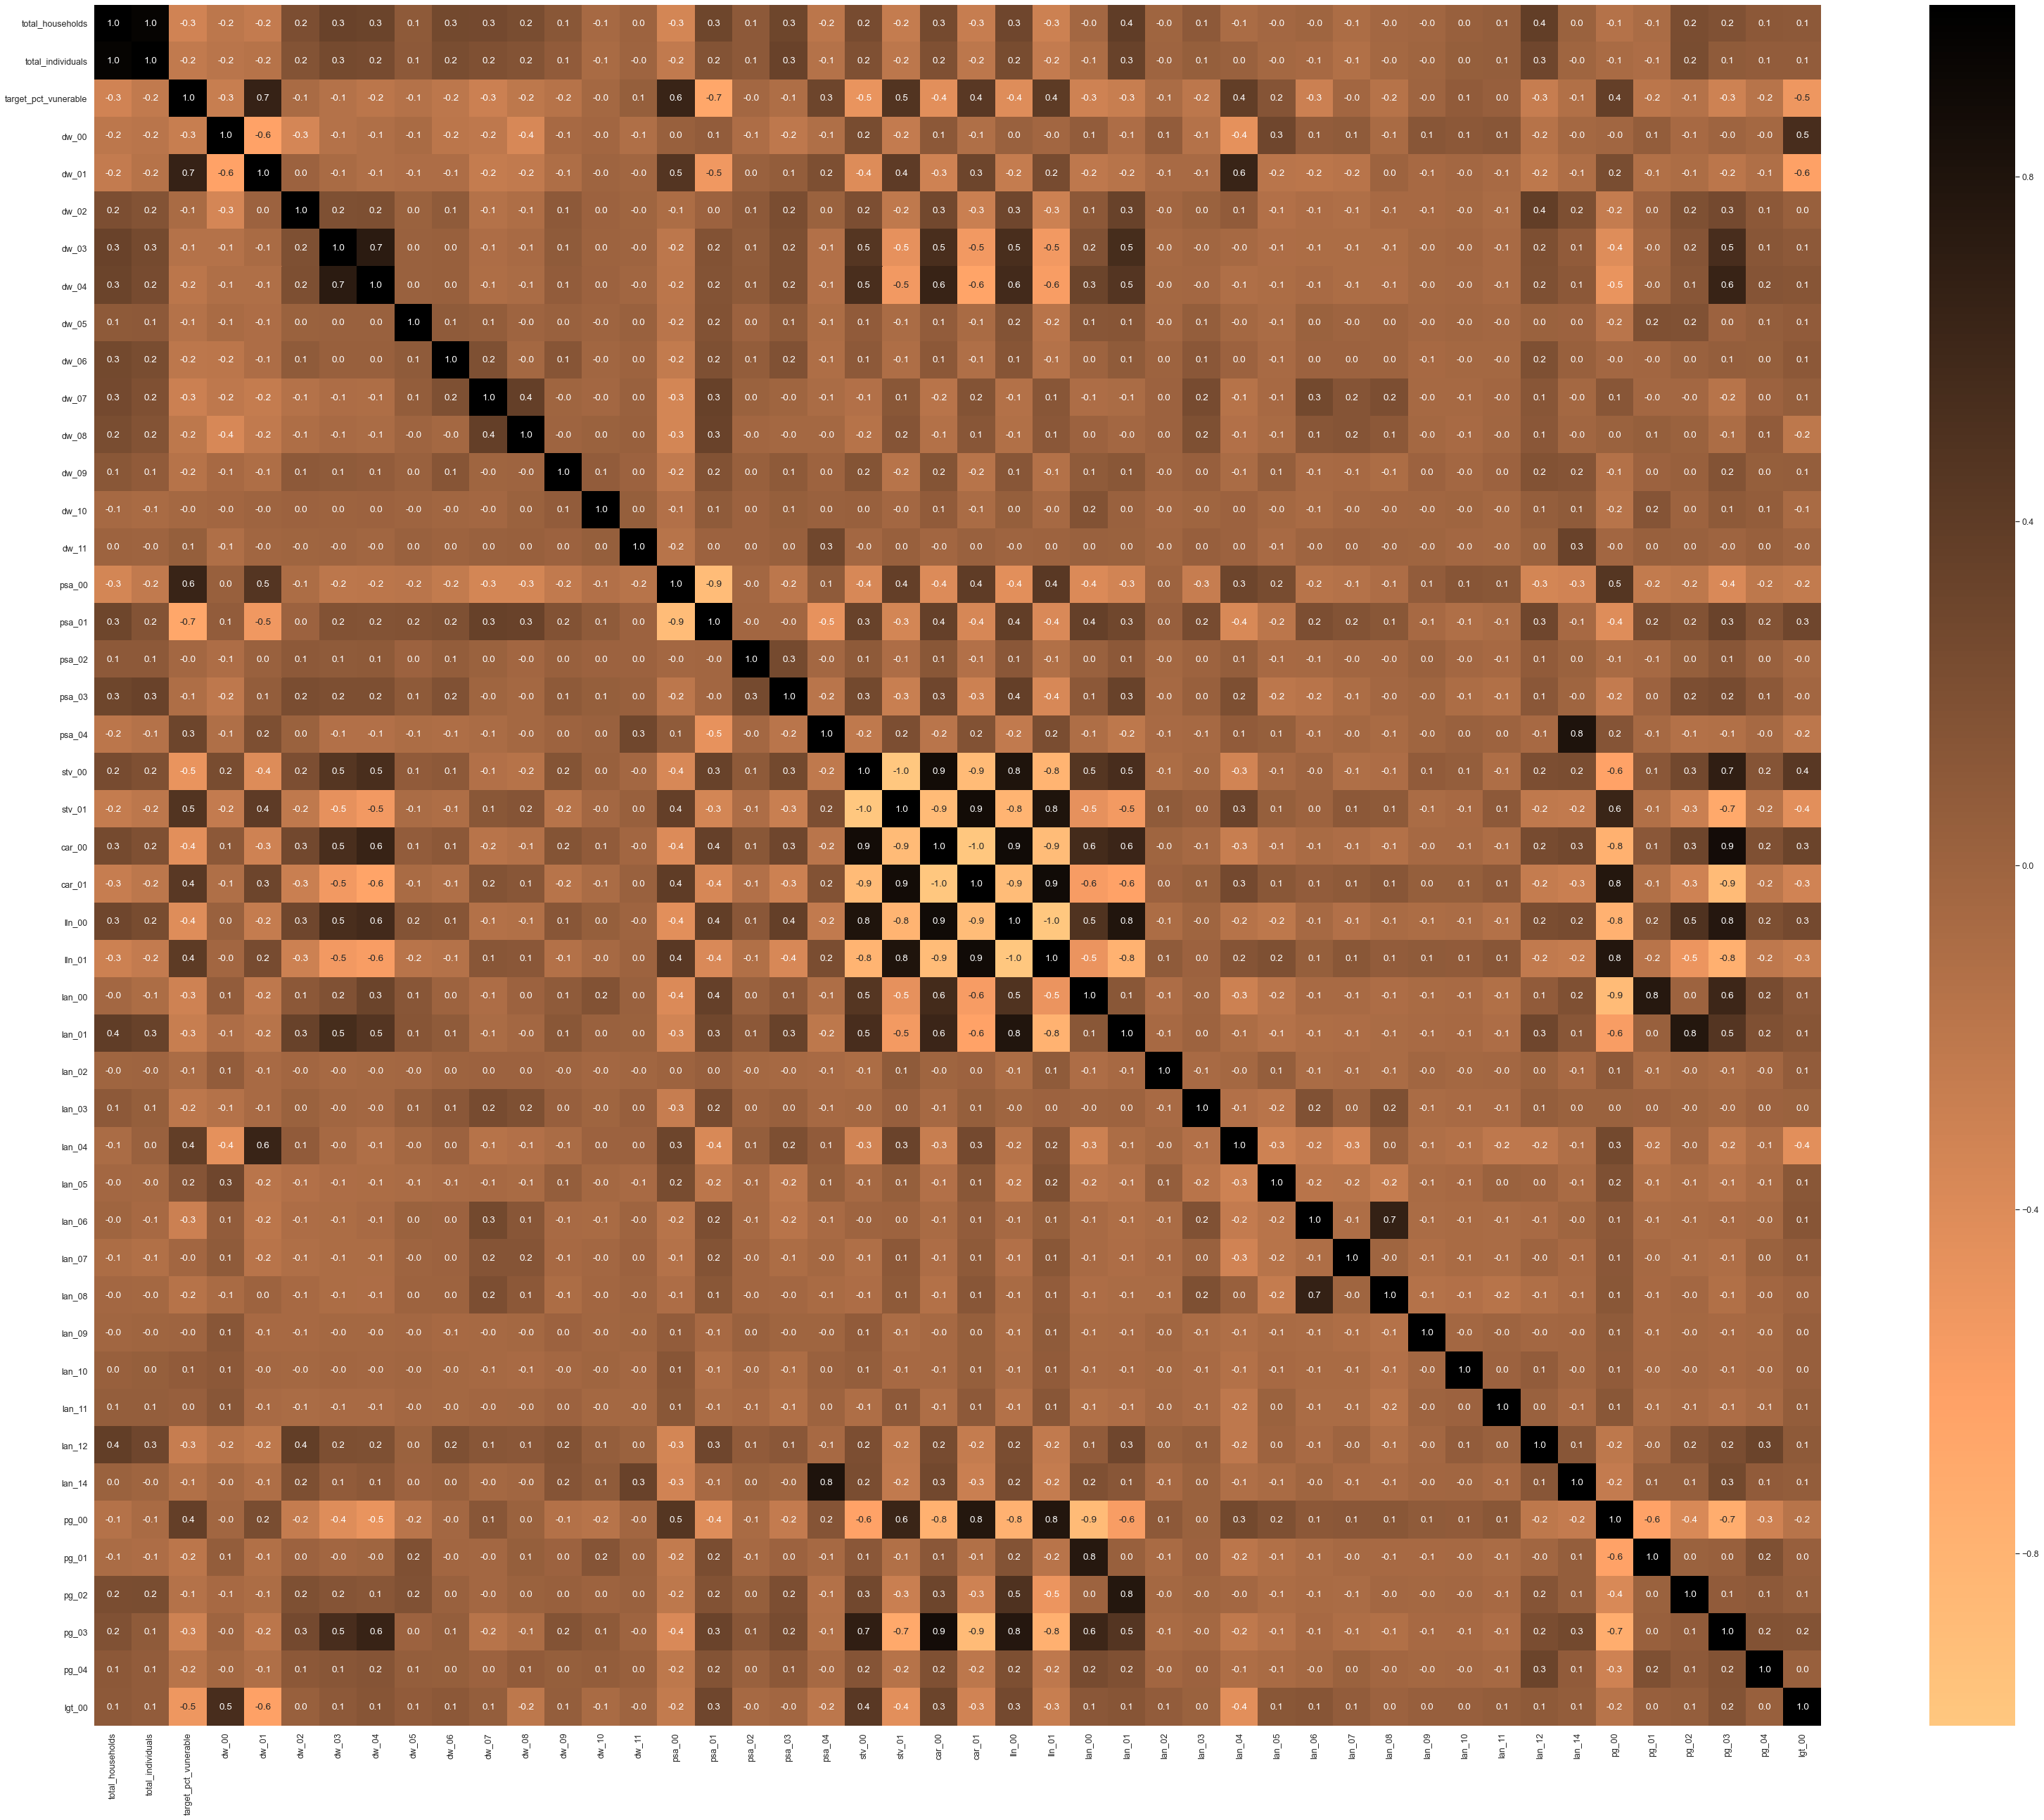

In [41]:
col = [col for col in train.columns]
data = train[col]
data_corr = data.corr()
fig, ax = plt.subplots(figsize=(55,45))
sns.heatmap(data=data_corr, annot=True, cmap='copper_r', fmt='.1f', ax=ax)
sns.set(font_scale=2.45)
plt.show


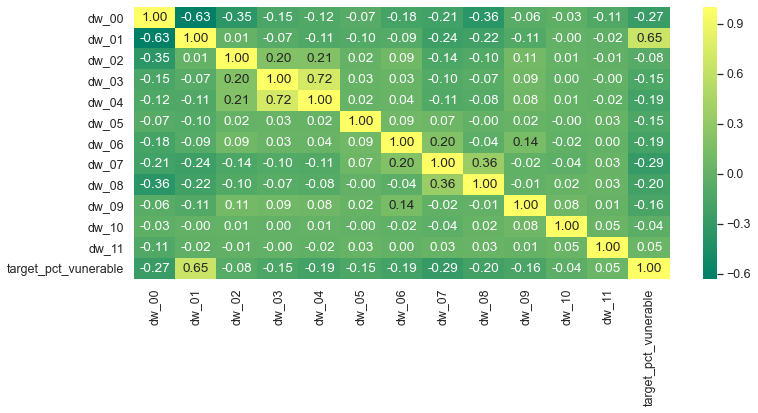

In [39]:
columns = [ 'dw_00', 'dw_01', 'dw_02', 'dw_03', 'dw_04', 'dw_05', 'dw_06', 'dw_07', \
           'dw_08', 'dw_09', 'dw_10', 'dw_11', 'target_pct_vunerable']
# we want to see the correlation between the percentage of dwellings.

col = train[columns]
col_corr = col.corr()
fig, ax = plt.subplots(figsize=(12,5))
sns.heatmap(col_corr, cmap='summer', annot=True, fmt='.2f', ax=ax)
sns.set(font_scale=1.13)
plt.show() # we see that most of the features are not really colinear with each other, and to the target there is a big 
            # difference in correlation, this can improve the model, except 'dw_01'.

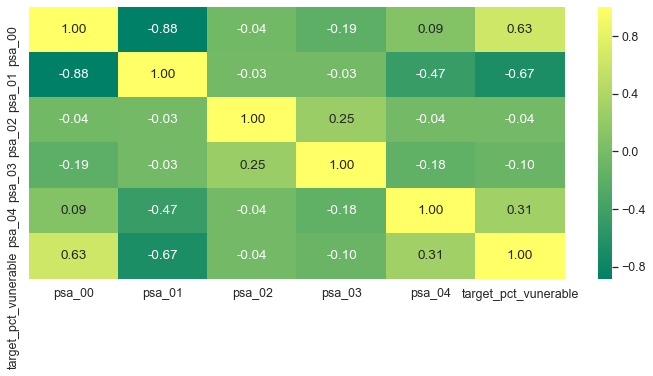

In [40]:
columns = [ 'psa_00', 'psa_01', 'psa_02', 'psa_03', 'psa_04', 'target_pct_vunerable']

col = train[columns]
col_corr = col.corr()
fig, ax = plt.subplots(figsize=(12,5))
sns.heatmap(col_corr, cmap='summer', annot=True, fmt='.2f', ax=ax)
sns.set(font_scale=1.13)
plt.show()
# psa_01 is a good feature for the target_pct_vunerable

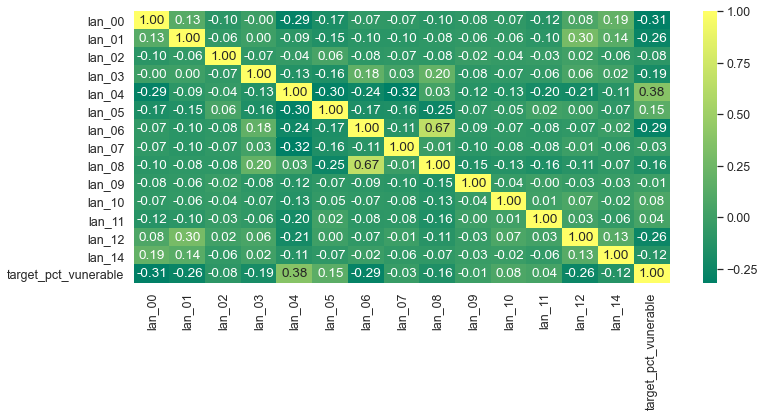

In [60]:
columns= ['lan_00', 'lan_01', 'lan_02', 'lan_03', 'lan_04', 'lan_05',\
          'lan_06', 'lan_07', 'lan_08', 'lan_09', 'lan_10', 'lan_11',\
          'lan_12','lan_14', 'target_pct_vunerable']
col = train[columns]
col_corr = col.corr()
fig, ax = plt.subplots(figsize=(12,5))
sns.heatmap(col_corr, cmap='summer', annot=True, fmt='.2f', ax=ax)
sns.set(font_scale=0.13)
plt.show()


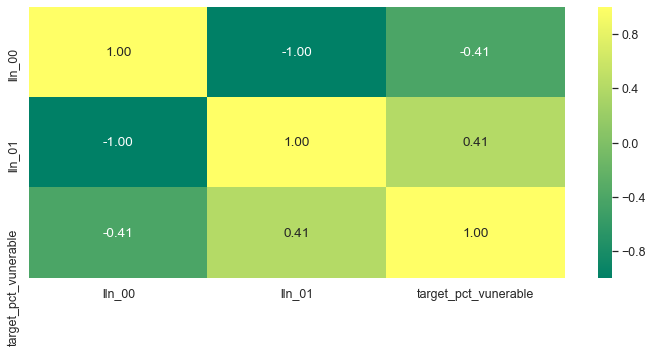

In [65]:
columns = ['lln_00','lln_01','target_pct_vunerable']

col = train[columns]
col_corr = col.corr()
fig, ax = plt.subplots(figsize=(12,5))
sns.heatmap(col_corr, cmap='summer', annot=True, fmt='.2f', ax=ax)
sns.set(font_scale=3.13)
plt.show()# lln_00 is a good for the model other then the rest, here

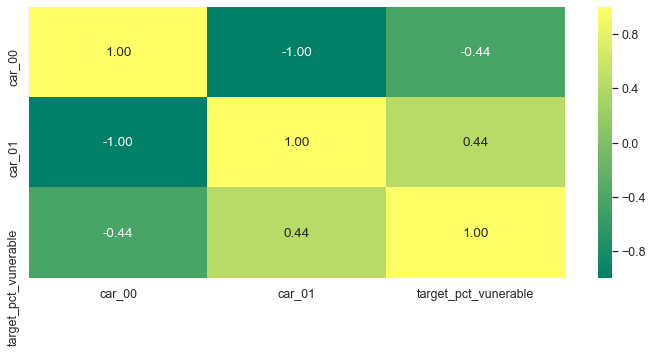

In [79]:
columns = ['car_00', 'car_01', 'target_pct_vunerable']

col = train[columns]
col_corr = col.corr()
fig, ax = plt.subplots(figsize=(12,5))
sns.heatmap(col_corr, cmap='summer', annot=True, fmt='.2f', ax=ax)
sns.set(font_scale=1.13)
plt.show()# we see that car_00 is good.

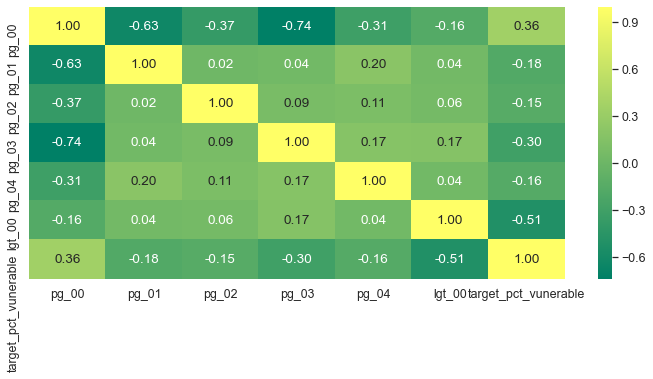

In [80]:
columns = [ 'pg_00', 'pg_01', 'pg_02', 'pg_03', 'pg_04', 'lgt_00', 'target_pct_vunerable']

col = train[columns]
col_corr = col.corr()
fig, ax = plt.subplots(figsize=(12,5))
sns.heatmap(col_corr, cmap='summer', annot=True, fmt='.2f', ax=ax)
sns.set(font_scale=1.13)
plt.show()# all are good to the target except pg_00

<Figure size 720x576 with 0 Axes>

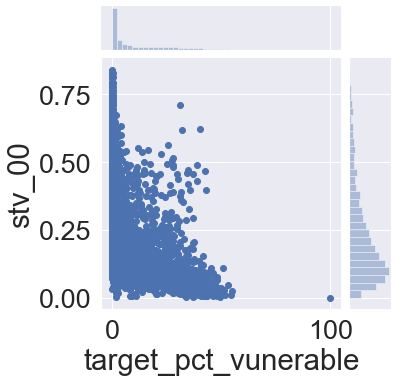

In [45]:
jointplot('stv_00' )

<Figure size 720x576 with 0 Axes>

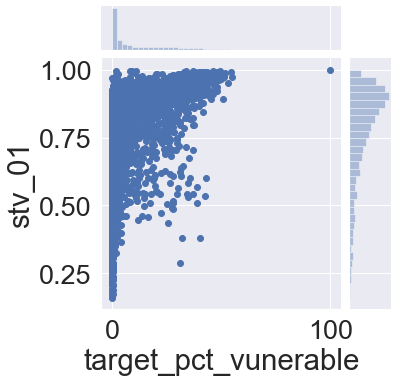

In [46]:
jointplot('stv_01')

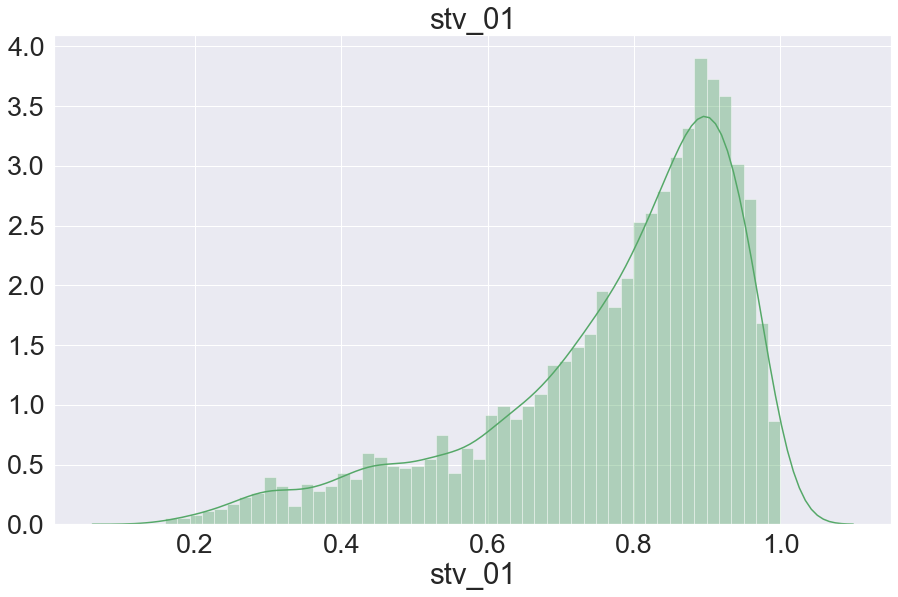

In [48]:
distplot('stv_01')# negative skew plot.

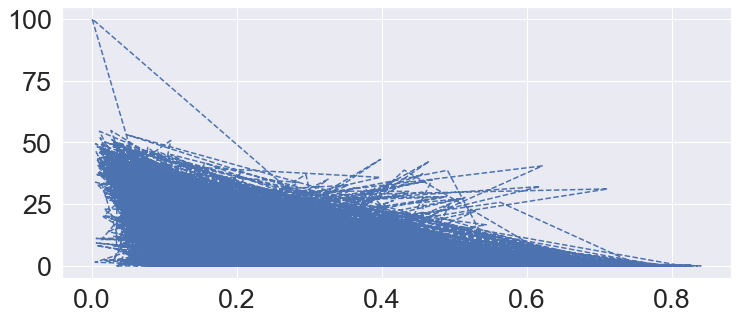

In [53]:
plt.figure(figsize=(12,5))
plt.plot('stv_00', 'target_pct_vunerable', data=train, linestyle='dashed' )
plt.show()

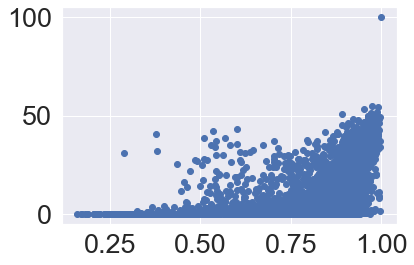

In [56]:
plt.scatter(x='stv_01', y='target_pct_vunerable', data=train)

In [57]:
train.describe()

,total_households,total_individuals,target_pct_vunerable,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,dw_07,dw_08,dw_09,dw_10,dw_11,psa_00,psa_01,psa_02,psa_03,psa_04,stv_00,stv_01,car_00,car_01,lln_00,lln_01,lan_00,lan_01,lan_02,lan_03,lan_04,lan_05,lan_06,lan_07,lan_08,lan_09,lan_10,lan_11,lan_12,lan_14,pg_00,pg_01,pg_02,pg_03,pg_04,lgt_00
count,3174.000000,3174.000000,3174.000000,3174.000000,3174.000000,3174.000000,3174.000000,3174.000000,3174.000000,3174.000000,3174.000000,3174.000000,3174.000000,3174.000000,3174.000000,3174.000000,3174.000000,3174.000000,3174.000000,3174.000000,3174.000000,3174.000000,3174.000000,3174.000000,3174.000000,3174.000000,3174.000000,3174.000000,3174.000000,3174.000000,3174.000000,3174.000000,3174.000000,3174.000000,3174.000000,3174.000000,3174.000000,3174.000000,3174.000000,3174.000000,3174.000000,3174.000000,3174.000000,3174.000000,3174.000000,3174.000000
mean,3429.319013,12407.679534,10.258947,0.710593,0.097372,0.031894,0.005820,0.008202,0.006047,0.022225,0.038319,0.063715,0.006930,0.001127,0.007755,0.312657,0.525168,0.000529,0.033372,0.128275,0.227041,0.772959,0.247346,0.752654,0.094815,0.905185,0.099168,0.055713,0.027305,0.038956,0.286185,0.124729,0.101015,0.125917,0.004469,0.033728,0.025812,0.050327,0.012342,0.014335,0.863095,0.041924,0.017665,0.073692,0.003624,0.830599
std,3117.342795,9310.300318,12.847192,0.217458,0.188484,0.078634,0.018592,0.029408,0.023772,0.036762,0.057300,0.112869,0.016721,0.003024,0.023633,0.077324,0.086378,0.000800,0.023162,0.037205,0.174264,0.174264,0.191623,0.191623,0.128051,0.128051,0.208439,0.118529,0.084939,0.082229,0.373403,0.268643,0.212630,0.254600,0.004541,0.146854,0.132935,0.153493,0.020594,0.041155,0.248096,0.146524,0.074607,0.169049,0.010378,0.208129
min,1.000000,402.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001293,0.000000,0.000000,0.017142,0.000000,0.159514,0.000000,0.041328,0.000000,0.237387,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011053,0.000000,0.000000,0.000000,0.000000,0.001692
25%,1668.367500,6972.024960,0.429761,0.591480,0.002919,0.002421,0.000000,0.000000,0.000000,0.002676,0.004586,0.002785,0.000230,0.000000,0.001980,0.257287,0.463773,0.000129,0.017002,0.110695,0.097476,0.690788,0.130916,0.722213,0.017237,0.885495,0.002751,0.009098,0.003905,0.001501,0.010134,0.001699,0.002348,0.003819,0.001625,0.000282,0.000303,0.000453,0.002477,0.000000,0.879603,0.000960,0.000848,0.000445,0.000633,0.788085
50%,2263.921720,9217.504670,3.715314,0.766925,0.010649,0.005792,0.000803,0.000603,0.000813,0.008408,0.015730,0.013708,0.001805,0.000384,0.004036,0.304729,0.536555,0.000331,0.026922,0.126238,0.173693,0.826307,0.175293,0.824707,0.038871,0.961129,0.007524,0.017168,0.008773,0.007716,0.046517,0.004038,0.015129,0.007968,0.002930,0.001245,0.001195,0.003092,0.006266,0.000097,0.989811,0.003088,0.001753,0.001206,0.001630,0.909446
75%,3681.155303,13463.543668,17.762604,0.885571,0.074650,0.028085,0.002538,0.002145,0.002921,0.025111,0.046804,0.071619,0.006572,0.001043,0.007656,0.372288,0.585624,0.000670,0.043033,0.140186,0.309212,0.902524,0.277787,0.869084,0.114505,0.982763,0.058908,0.035325,0.014472,0.037176,0.588227,0.054319,0.061918,0.060096,0.005578,0.006605,0.004992,0.028330,0.013430,0.011548,0.995798,0.012419,0.004636,0.039255,0.004025,0.963780
max,39595.195110,91716.746370,100.000000,0.994962,0.931490,0.951806,0.264239,0.392085,0.435912,0.412936,0.455815,0.958846,0.282843,0.068752,1.000000,0.732103,0.927887,0.019442,0.267377,0.998707,0.840486,1.000000,0.958672,1.000000,0.762613,1.000000,0.983206,0.939549,0.895365,0.852927,0.986877,0.982283,0.981207,0.963219,0.034234,0.981233,0.985258,0.991674,0.367785,0.998448,1.000000,0.969519,0.939564,0.940563,0.367842,1.000000
